In [3]:
# Importing the neccesary libraries we are going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='charges', ylabel='age'>

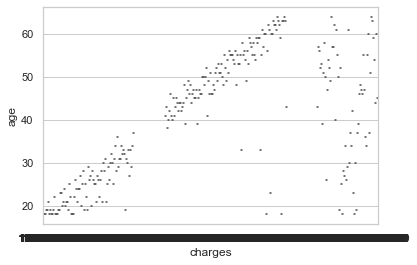

In [6]:
# plot
sns.violinplot(x='charges', y='age', data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

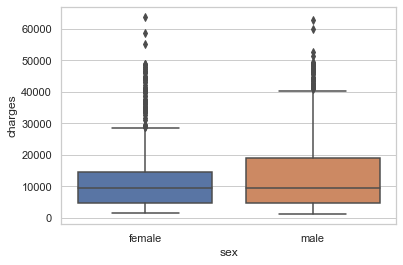

In [9]:
sns.boxplot(x="sex", y="charges", data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

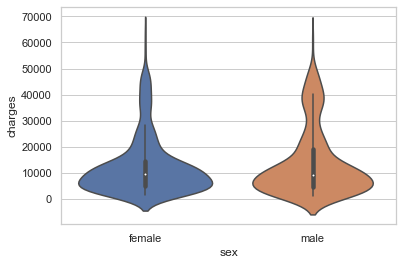

In [17]:
# plot
sns.violinplot(x='sex', y='charges', data=df)

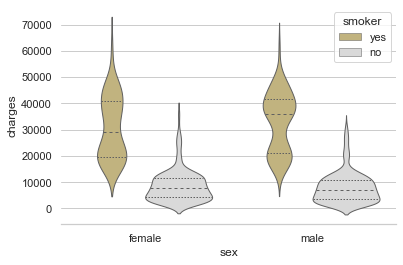

In [12]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="sex", y="charges", hue="smoker",
               split=False, inner="quart", linewidth=1,
               palette={"yes": "y", "no": ".85"})
sns.despine(left=True)

<AxesSubplot:xlabel='children', ylabel='charges'>

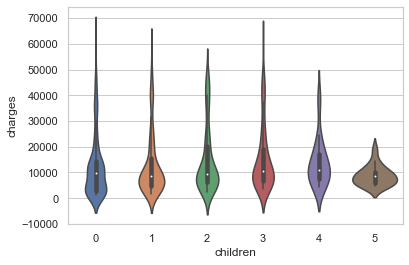

In [18]:
# plot
sns.violinplot(x='children', y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

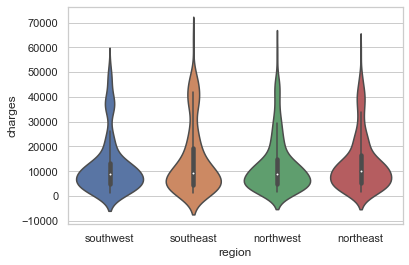

In [20]:
# plot
sns.violinplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

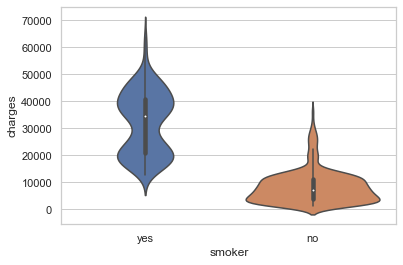

In [19]:
# plot
sns.violinplot(x='smoker', y='charges', data=df)

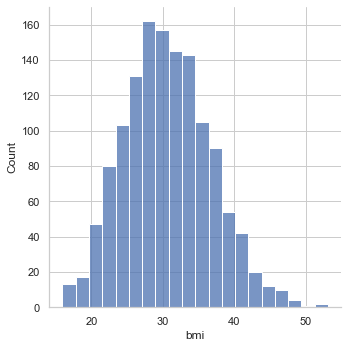

In [12]:
# Control the number of bins
sns.displot( df["bmi"], bins=20 )
#sns.plt.show()

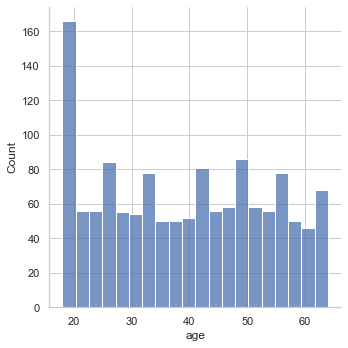

In [13]:

# Control the number of bins
sns.displot( df["age"], bins=20 )
#sns.plt.show()


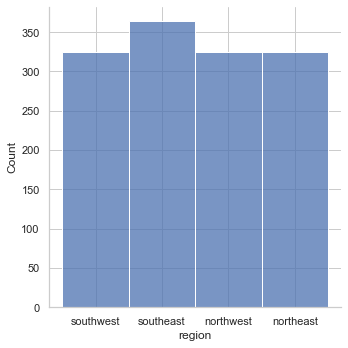

In [14]:
# Control the number of bins
sns.displot( df["region"], bins=20 )
#sns.plt.show()


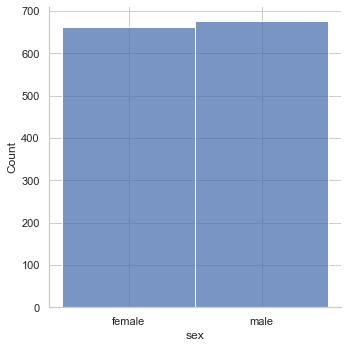

In [15]:
# Control the number of bins
sns.displot( df["sex"], bins=20 )
#sns.plt.show()

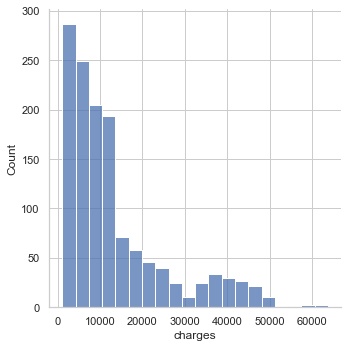

In [16]:
# Control the number of bins
sns.displot( df["charges"], bins=20 )
#sns.plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")
df["region"] = df["region"].astype("category")
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df["sex"].replace({"female": 1, "male": 0}, inplace=True)
df["smoker"].replace({"yes": 1, "no": 0}, inplace=True)
df["region"].replace({"southeast": 3, "northeast": 2, "southwest": 1, "northwest": 0}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


<AxesSubplot:>

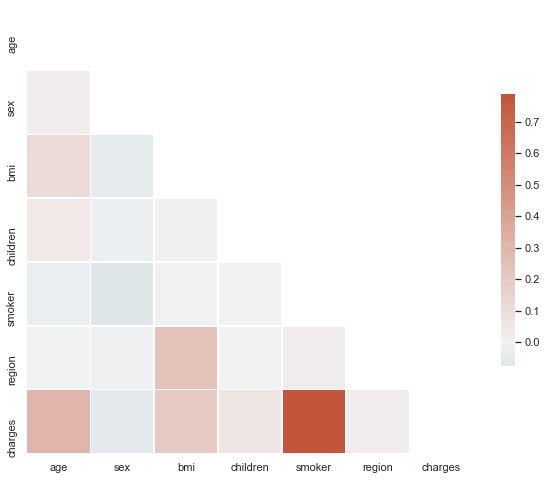

In [48]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
x = df.drop('charges', axis =1)
y = df['charges']

In [50]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [51]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 42)

In [54]:
reg = LinearRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output

LinearRegression()

In [57]:
y_hat = reg.predict(x_test) # y_hat holding the prediction made with the algorithm using x_test

In [58]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_hat)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))

R2 Score : 0.7838273852860941
Model Accuracy: 78.38273852860941%


In [59]:
reg.intercept_ # Intercept of the regression

13315.680850432962

In [60]:
reg.coef_ # coefficients of the variables / features 

array([3605.17779235,   10.56245815, 2060.64228193,  508.88506711,
       9550.37355602, -276.23747042])

In [63]:
result = pd.DataFrame(data = x.columns, columns = ['Features'])
result['weight'] = np.transpose(reg.coef_)
result

,Features,weight
0,age,3605.177792
1,sex,10.562458
2,bmi,2060.642282
3,children,508.885067
4,smoker,9550.373556
5,region,-276.237470


In [65]:
c2b = df['charges'].corr(df['bmi'], method ='pearson')
c2b

0.19834096883362895

In [64]:
c3b = df['charges'].corr(df['smoker'], method ='pearson')
c3b

0.787251430498478